# Graph

- Graph : 정점(Vertex) 간의 관계를 표현하는 자료 구조
    - G = (V, E) 
    - V : vertex, E : edge
- Graph vs Tree

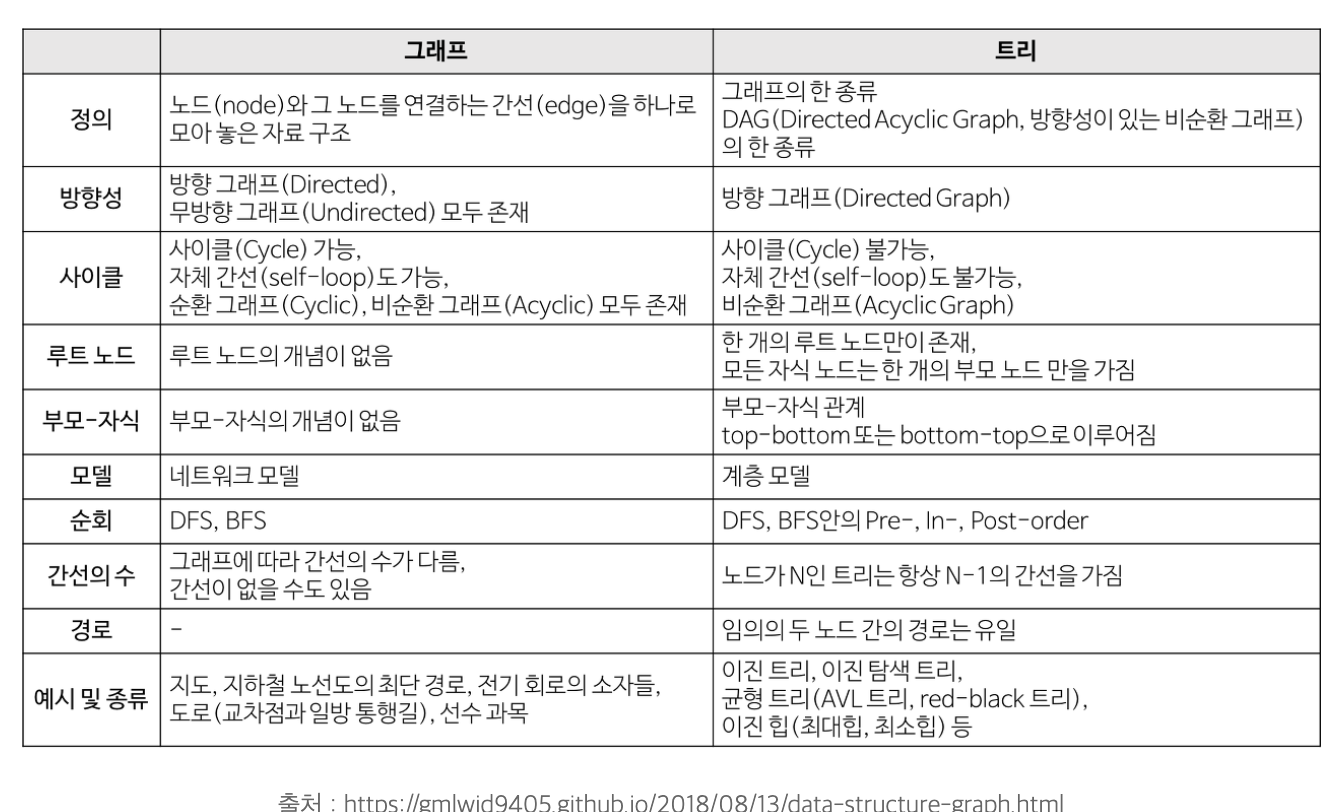

In [2]:
from IPython.display import Image
Image("../img/Graph_Tree.png") # code안에서 나오게 할 때

# Tree

*****
- Tree : 비선형 자료 구조 중, 자료들 간에 계층관계를 가진 계층형 자료 구조

    - 트리를 구성하는 원소(자료)를 노드라고 하고 노드를 연결하는 선을 간선(edge)이라 한다.

    - 트리의 시작 노드를 루트 노드(Root)라 하고 레벨(level) 0이 된다.

    - 각 노드는 자식노드 수만큼의 서브트리(subtree)를 갖는다.

    - 한 노드가 가지는 서브 트리의 수, 즉 자식노드의 수를 그 노드의 차수(degree)라 한다.

    - 노드의 차수 중에서 가장 큰 차수는 트리의 차수가 된다. 
    
    - 자식이 없는 노드를 리프 노드(Leaf Node) 또는 단말 노드라고 한다.

    - 조상은 자기와 연결된 선을 따라 위로 올라가면서 만나는 사람들이다.

    - 자손은 자기와 연결된 선을 따라 아래로 내려가면서 만나는 사람들이다.

    - 높이는 루트에서 그 노드에 이르는 경로에 있는 간선의 수가되고, 최대 레벨이 그 트리의 전체 높이가 된다.

    - 나무가 모이면 숲이 되듯이 여러 트리의 집합을 포리스트(forest)라고 한다.
    
    출처: https://songeunjung92.tistory.com/26 [은져미]
*******
- 자식 노드 수에 따른 분류
    * General Tree : 각 노드의 차수에 제한이 없는 트리
    * Binary Tree : 트리의 차수가 2 이하인 트리
        - 트리를 구성하는 각 노드의 차수가 0 or 2 인 경우
        - Knuth : 트리를 구성하는 노드의 차수가 2 이하인 경우 (즉, 모든 이진트리가 knuth 이진트리)
        - Full Binary Tree : 각 노드의 차수가 0 or 2 이면서, 높이 h 인 트린의 모든 leaf 노드가 레벨 h 에 있는 트리
    * Quad Tree : 트리의 차수가 3인 트리
    
- Order
    * Ordered Tree : 노드들의 좌우 배열 순서가 고정되어, 노드의 위치가 중요한 트리
    * Oriented Tree : 노드간의 레벨 차이는 의미가 있지만 위치는 중요하지 않음
********

- 이진 트리 : 이진 트리의 순회는 재귀 호출을 사용한다. 따라서 전위, 중위, 후위 순회를 간단하게 구현할 수 있다. 순회란 모든 원소를 빠트리거나 중복하지 않고 처리하는 연산을 의미한다.

- 스레드 이진 트리 : 이진 트리의 위 특징 때문에 시스템 혹은 외부 스택을 관리해야하며 하위 레벨로 내려갈수록 재귀 호출의 깊이가 깊어져 비효율적일 수 있다. 스레드 이진 트리는 재귀 호출 없이 순회할 수 있도록 구현된 트리이다.

- 이진 탐색 트리 : 트리를 효율적으로 구현하고 사용하기 위해서 일정한 조건으로 정의한 것이다. 탐색용 자료구조로 사용되어 노드의 크기에 따라서 위치를 정의한다.

- AVL 트리 : 이진 탐색 트리는 좌우 균형이 잘 맞으면 탐색 성능이 높다. AVL 트리는 각 노드의 왼쪽 서브 트리의 높이와 오른쪽 서브 트리의 높이를 비교하여 트리의 균형을 조절한다.

- Heap : 노드중에서 키값이 가장 큰 노드나 가장 작은 노드를 찾기 위해 만든 자료구조다.

https://blex.kr/@baealex/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%EA%B5%AC%ED%98%84%ED%95%9C-%EC%9E%90%EB%A3%8C%EA%B5%AC%EC%A1%B0-%ED%8A%B8%EB%A6%AC


Cf. 이진트리 구현

In [10]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

    def __str__(self):
        return str(self.data)

class Tree:
    def __init__(self):
        self.root = None
        
node = []
node.append(Node('-'))
node.append(Node('*'))
node.append(Node('/'))
node.append(Node('A'))
node.append(Node('B'))
node.append(Node('C'))
node.append(Node('D'))


# Even Tree

* DFS 로 subtree 찾기
https://www.geeksforgeeks.org/sub-tree-nodes-tree-using-dfs/

In [2]:
#!/bin/python3

import math
import os
import random
import re
import sys


def bfs(graph, start_node):
#     visit = list()
#     queue = list()
    visit = {}
    queue = list()
    
    queue.append(start_node)

    while queue:
        node = queue.pop(0)
        if node not in visit:
            visit[node] = True
            queue.extend(graph[node])
            
    return visit

# Complete the evenForest function below.
def evenForest(t_nodes, t_edges, t_from, t_to):
    count = 0;
    ### subtree 의 node 수를 알아야 함!
    print("from : ", t_from)
    print("to: ", t_to)
    
    
    #1. 각 노드의 child 수
    node_dict = {}
    for i in range(1, t_nodes+1):
        node_dict[i] = []
        to_idx = [index for index, value in enumerate(t_to) if value == i]
        
        for idx in to_idx:
            node_dict[i].append(t_from[idx])
    
    for i in range(1, t_nodes+1):
        print("[" , i , "]" , bfs(node_dict, i))
        if len(bfs(node_dict, i)) != t_nodes and len(bfs(node_dict, i))%2 == 0:
            count +=1

    return count
    
if __name__ == '__main__':
#     fptr = open(os.environ['OUTPUT_PATH'], 'w')

#     t_nodes, t_edges = map(int, input().rstrip().split())
    t_nodes = 10
    t_edges= 9
    
    t_from = [0] * t_edges
    t_to = [0] * t_edges
    
    t_from = [2,3,4,5,6,7,8,9,10]
    t_to = [1,1,3,2,1,2,6,8,8]

#     for i in range(t_edges):
#         t_from[i], t_to[i] = map(int, input().rstrip().split())

    res = evenForest(t_nodes, t_edges, t_from, t_to)

    print(res)
#     fptr.write(str(res) + '\n')

#     fptr.close()


from :  [2, 3, 4, 5, 6, 7, 8, 9, 10]
to:  [1, 1, 3, 2, 1, 2, 6, 8, 8]
[ 1 ] {1: True, 2: True, 3: True, 6: True, 5: True, 7: True, 4: True, 8: True, 9: True, 10: True}
[ 2 ] {2: True, 5: True, 7: True}
[ 3 ] {3: True, 4: True}
[ 4 ] {4: True}
[ 5 ] {5: True}
[ 6 ] {6: True, 8: True, 9: True, 10: True}
[ 7 ] {7: True}
[ 8 ] {8: True, 9: True, 10: True}
[ 9 ] {9: True}
[ 10 ] {10: True}
2


## BFS, DFS

개념 - https://jeinalog.tistory.com/18

코드 - https://itholic.github.io/python-bfs-dfs/
    - 그래프를 dictionary 형태로 만들 수 있을 때

In [18]:
def bfs(graph, start_node):
#     visit = list()
#     queue = list()
    visit = {}
    queue = list()
    
    queue.append(start_node)

    ## 큐의 목록이 바닥날 때까지 (더 이상 방문할 노드가 없을 때까지) loop 돌리기
    while queue:
        ## 큐의 맨 앞 노드를 꺼내기
        node = queue.pop(0)
        
        ## 해당 노드가 아직 방문 리스트에 없다면
        if node not in visit:
            ## 방문 리스트에 추가
            visit[node] = True
            ## 해당 노드의 자식 노드들을 큐에 추가
            queue.extend(graph[node])
            
    return visit


def dfs(graph, start_node):
    visit = list()
    stack = list()

    stack.append(start_node)

    while stack:
        ## stack 의 맨 마지막에 넣었던 아이템 가져오기
        node = stack.pop()
        if node not in visit:
            visit.append(node)
            stack.extend(graph[node])
    
    return visit

# Rodas and Libraries

In [136]:
#!/bin/python3

import math
import os
import random
import re
import sys
import collections


def bfs(graph, root):
    M = len(graph)
    visited = [False  for _ in range(M+1)]
    queue = collections.deque([root])

    while queue:
        n = queue.popleft()
        if visited[n] == False:
            visited[n] = True
            queue += set(graph[n]) - set(visited)
    return visited


def generate_graph(connections):
    graph = {}
    for con in connections:
        graph[con[0]] = [con[1]] if con[0] not in graph else graph[con[0]] + [con[1],]
        graph[con[1]] = [con[0]] if con[1] not in graph else graph[con[1]] + [con[0],]
    return graph


# Complete the roadsAndLibraries function below.
def roadsAndLibraries(n, c_lib, c_road, cities):
    print("function : ", n, c_lib, c_road, cities)
    cost = 0
    ## graph - dictionary 형태로 만들기
    
    print("generate graph : ", generate_graph(cities))
    
    
#     node_dict = {}
#     graphs = []
#     graph_dict = {}
    
#     min_cost = []
    
#     if c_lib < c_road:
#         cost = c_lib * n
#         return cost
    
#     ## Node 간 연결관계 dict 만들기
#     for c in cities:
        
#         if c[0] not in set(node_dict):
#             node_dict[c[0]] = set([c[1]])
#         else:
#             node_dict[c[0]].add(c[1])
            
#         if c[1] not in set(node_dict):
#             node_dict[c[1]] = set([c[0]])
#         else:
#             node_dict[c[1]].add(c[0])
      
#     none = [x for x in range(1,n+1) if x not in node_dict]
    
#     for i in none:
#         node_dict[i] = []
   
#     print("node_dict:", node_dict, type(node_dict[1]))
    
    
#     ## 연결된 그래프 리스트 만들기
#     for node in set(node_dict):
#         bfs_result = bfs(node_dict, node)
#         bfs_key = set(bfs_result)
# #         bfs_key.sort()
        
#         if bfs_key not in graphs:
#             graphs.append(set(bfs_key))
                
#     ## 각 그래프별 최소 경로
#     for g in graphs:
#         min_road = len(g)-1
#         min_road_cost = min_road * c_road
#         total_cost = c_lib + min_road_cost
        
#         min_cost.append(total_cost)
    

#     cost = sum(min_cost)

#     print(node_dict)
    return cost


if __name__ == '__main__':
#     fptr = open(os.environ['OUTPUT_PATH'], 'w')

    q = int(input())

    for q_itr in range(q):
        nmC_libC_road = input().split()

    n = int(nmC_libC_road[0])

    m = int(nmC_libC_road[1])

    c_lib = int(nmC_libC_road[2])

    c_road = int(nmC_libC_road[3])

    cities = []
    


    for _ in range(m):
        cities.append(list(map(int, input().rstrip().split())))

    result = roadsAndLibraries(n, c_lib, c_road, cities)
    print("result " ,result)
        
#         fptr.write(str(result) + '\n')

#     fptr.close()


1
5 3 6 1
1 2
1 3
1 4
function :  5 6 1 [[1, 2], [1, 3], [1, 4]]
generate graph :  {1: [2, 3, 4], 2: [1], 3: [1], 4: [1]}
result  0


## Solution...

In [158]:
#!/bin/python3

import math
import os
import random
import re
import sys
import collections




def generate_graph(connections):
    graph = {}
    for con in connections:
        graph[con[0]] = [con[1]] if con[0] not in graph else graph[con[0]] + [con[1],]
        graph[con[1]] = [con[0]] if con[1] not in graph else graph[con[1]] + [con[0],]
    return graph


# Complete the roadsAndLibraries function below.
def roadsAndLibraries(n, c_lib, c_road, cities):
    graph = generate_graph(cities)
    visited = set()
    q =  collections.deque()
    
    road_count = 0
    library_count = 0
    
    if c_lib < c_road:
        return n*c_lib
    
    for city in range(1, n+1):
        if city not in visited:
            
            
            library_count += 1
            q.append(city)
            visited.add(city)
            
            while q:
                n = q.pop()
                
                if n in graph: ## n 은 node 
                    print("n : ", n, "graph[n] : ", graph[n])
                    for nbour in graph[n]: ## nbour : node n 에 연결된 다른 노드
                        if nbour not in visited:
                            road_count += 1
                            q.append(nbour)
                            visited.add(nbour)
                            print("n:", n, " q :" , q," nbour: ", nbour, " visited:", visited)
                            
    return library_count*c_lib + road_count*c_road



if __name__ == '__main__':
#     fptr = open(os.environ['OUTPUT_PATH'], 'w')

    q = int(input())

    for q_itr in range(q):
        nmC_libC_road = input().split()

    n = int(nmC_libC_road[0])

    m = int(nmC_libC_road[1])

    c_lib = int(nmC_libC_road[2])

    c_road = int(nmC_libC_road[3])

    cities = []
    


    for _ in range(m):
        cities.append(list(map(int, input().rstrip().split())))

    result = roadsAndLibraries(n, c_lib, c_road, cities)
    print("result " ,result)
        
#         fptr.write(str(result) + '\n')

#     fptr.close()


1
6 6 3 2
1 3
3 4
2 4
1 2
2 3
5 6
n :  1 graph[n] :  [3, 2]
n: 1  q : deque([3])  nbour:  3  visited: {1, 3}
n: 1  q : deque([3, 2])  nbour:  2  visited: {1, 2, 3}
n :  2 graph[n] :  [4, 1, 3]
n: 2  q : deque([3, 4])  nbour:  4  visited: {1, 2, 3, 4}
n :  4 graph[n] :  [3, 2]
n :  3 graph[n] :  [1, 4, 2]
n :  5 graph[n] :  [6]
n: 5  q : deque([6])  nbour:  6  visited: {1, 2, 3, 4, 5, 6}
n :  6 graph[n] :  [5]
result  14


# Journey to the Moon

In [198]:
#!/bin/python3

import math
import os
import random
import re
import sys
import collections

def bfs(graph, start_node):
#     visit = list()
#     queue = list()
    visit = {}
    queue = list()
    
    queue.append(start_node)

    ## 큐의 목록이 바닥날 때까지 (더 이상 방문할 노드가 없을 때까지) loop 돌리기
    while queue:
        ## 큐의 맨 앞 노드를 꺼내기
        node = queue.pop(0)
        
        ## 해당 노드가 아직 방문 리스트에 없다면
        if node not in visit:
            ## 방문 리스트에 추가
            visit[node] = True
            ## 해당 노드의 자식 노드들을 큐에 추가
            queue.extend(graph[node])
            
    return visit




def generate_graph(connections):
    graph = {}
    for con in connections:
        graph[con[0]] = [con[1]] if con[0] not in graph else graph[con[0]] + [con[1],]
        graph[con[1]] = [con[0]] if con[1] not in graph else graph[con[1]] + [con[0],]
    return graph

# Complete the journeyToMoon function below.
def journeyToMoon(n, astronaut):

    graph = generate_graph(astronaut)

    print("Graph : ", graph)
    
    
    visited = set()
    q =  collections.deque()
    
    graph_ast = []    
    count = 1;

        ## 연결된 그래프 리스트 만들기
    for node in set(graph):
        bfs_result = bfs(graph, node)
        bfs_key = set(bfs_result)
        print("BFS result : ", bfs_result, bfs_key)
        
        if bfs_key not in graph_ast:
            print(bfs_key)
            graph_ast.append(bfs_key)
            count*= len(bfs_key)
            
    print("graph_ast", graph_ast, " count : ", count)
    return count

if __name__ == '__main__':
#     fptr = open(os.environ['OUTPUT_PATH'], 'w')

    np = input().split()

    n = int(np[0])

    p = int(np[1])

    astronaut = []

    for _ in range(p):
        astronaut.append(list(map(int, input().rstrip().split())))

    result = journeyToMoon(n, astronaut)

#     fptr.write(str(result) + '\n')

#     fptr.close()


5 3
0 1
2 3
0 4
Graph :  {0: [1, 4], 1: [0], 2: [3], 3: [2], 4: [0]}
BFS result :  {0: True, 1: True, 4: True} {0, 1, 4}
{0, 1, 4}
BFS result :  {1: True, 0: True, 4: True} {0, 1, 4}
BFS result :  {2: True, 3: True} {2, 3}
{2, 3}
BFS result :  {3: True, 2: True} {2, 3}
BFS result :  {4: True, 0: True, 1: True} {0, 1, 4}
graph_ast [{0, 1, 4}, {2, 3}]  count :  6


In [ ]:
tmp = {{0, 1, 4},{2, 3}}
[if x in tmp]